In [2]:
import numpy as np
import eoslib as eos
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [26]:
v = []
v2 = []
e = []
e2 = []
element = 'Cu'
c1 = open(element+'In2_C1_data.csv', 'r')
c16 = open(element+'In2_C16_data.csv', 'r')
c1lines  = c1.readlines()
c16lines2 = c16.readlines()
for line in c1lines:
    ve = line.split(',')
    v.append(float(ve[0])*4*0.1482)
    e.append(float(ve[1])*4*13.6057/1000)

for line in c16lines2:
    ve = line.split(',')
    v2.append(float(ve[0])*2*0.1482)
    e2.append(float(ve[1])*2*13.6057/1000)


V0 in A^3 =  263.5667198354064
E(V) in keV  =  -21.946136127896136
V0 in A^3 =  249.55588573119266
E(V) in keV  =  -21.945046302202446
dE in keV = 0.001090


(-0.0005136506090709147, 0.03)

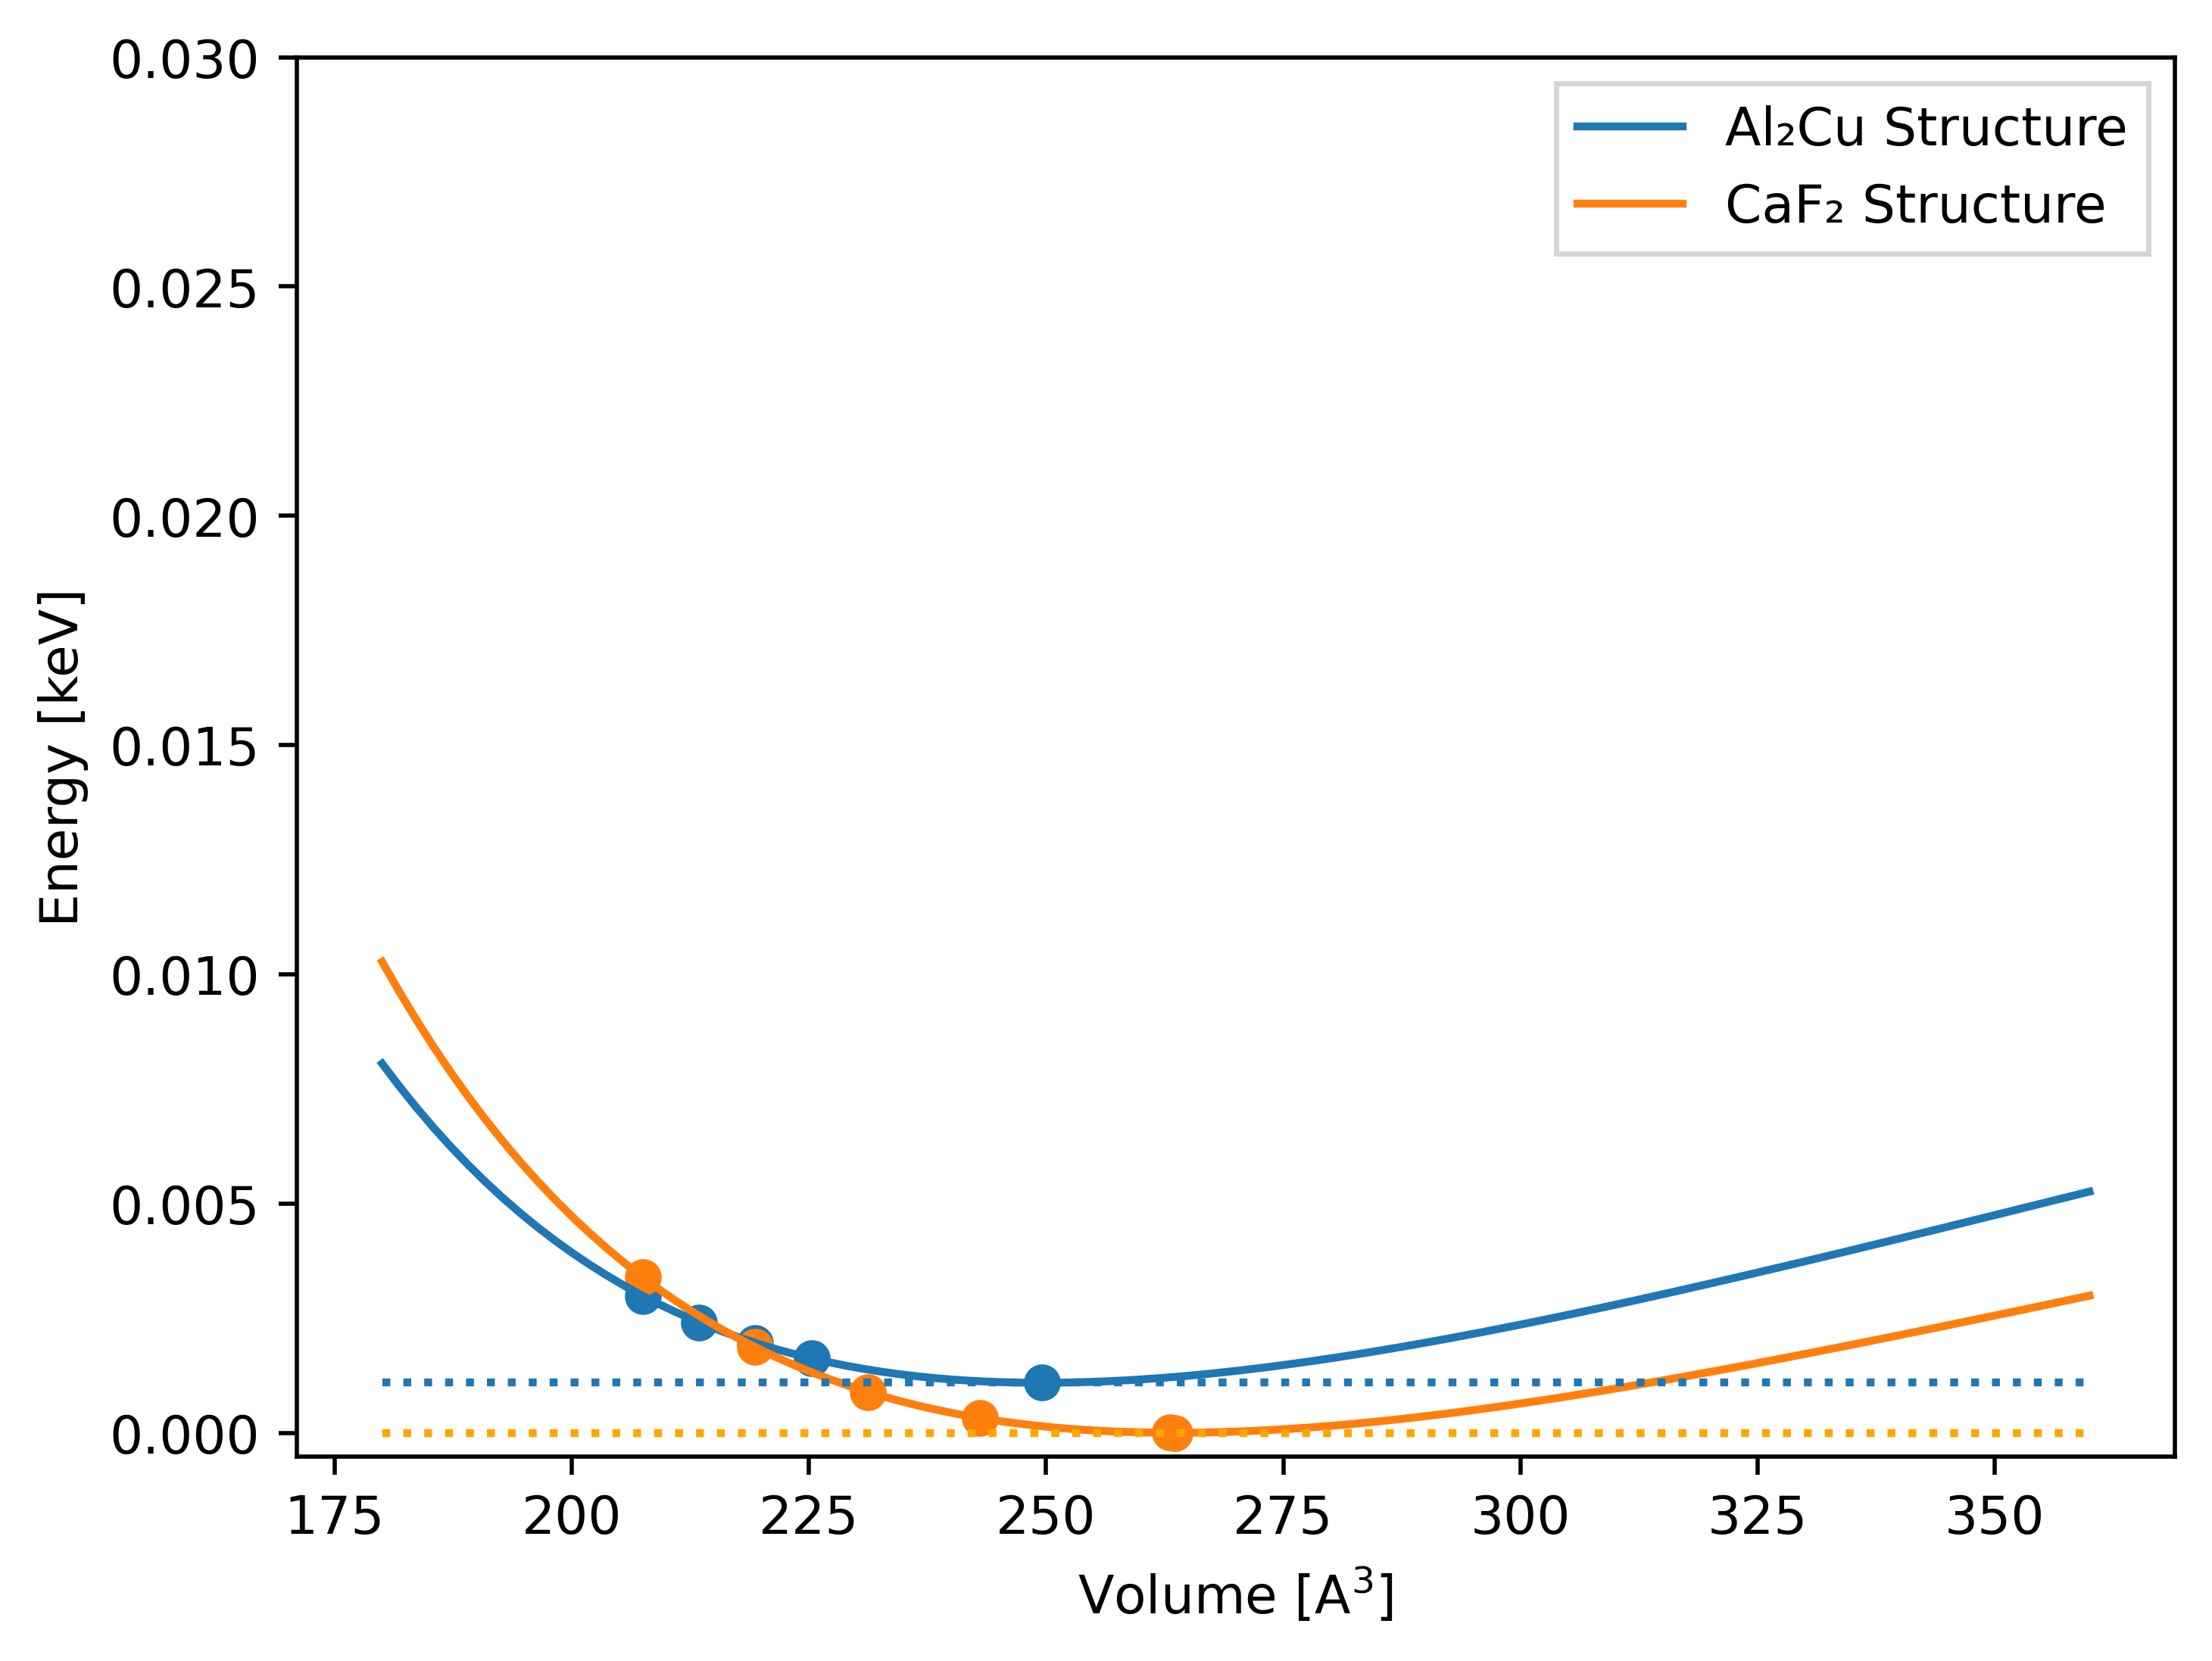

In [28]:
def plot_f(f, a, b, N, e0, symbol='o', title = None):
    x = np.linspace(a, b, N)
    y = list(map(f, x))
    adjy = []
    for i in range(len(y)):
        adjy.append(y[i]-e0)
    plt.plot(x, adjy, symbol, label=title)

vol, bmod, p, res = eos.eos_fit('birch', v, e)
vol2, bmod2, p2, res2 = eos.eos_fit('birch', v2, e2)

ene = p[0]
ene2 = p2[0]

if(ene > ene2):
    lowe = ene2
    dE = ene-ene2
else:
    lowe = ene
    dE = ene2-ene

print("V0 in A^3 = ", vol)
print("E(V) in keV  = ", ene)

print("V0 in A^3 = ", vol2)
print("E(V) in keV  = ", ene2)

print("dE in keV = %f"%dE)

adje = []
adje2 = []

for i in range(len(e)):
    adje.append(e[i]-lowe)
for i in range(len(e2)):
    adje2.append(e2[i]-lowe)

fig = plt.figure(dpi = 500)
ax = fig.add_subplot(111)
plt.xlabel('Volume [$\mathregular{A^3}$]')
plt.ylabel('Energy [keV]')
r = 100
min_x = 180
max_x = 360
plt.scatter(v2, adje2)
plt.scatter(v, adje)
plot_f(lambda x: eos.eos_birch(p2,x), min_x, max_x, r, lowe, symbol='-', title = 'Al\N{SUBSCRIPT TWO}Cu Structure')
plot_f(lambda x: eos.eos_birch(p,x), min_x, max_x, r, lowe, symbol='-', title = 'CaF\N{SUBSCRIPT TWO} Structure')
plt.hlines(y = ene2-lowe, xmin = min_x, xmax = max_x, linestyle = ':')
plt.hlines(y = ene-lowe, xmin = min_x, xmax = max_x, linestyle = ':', colors = 'orange')
plt.legend(fancybox = False)
ax.set_ylim(top = 0.03)
# y_formatter = ScalarFormatter(useOffset=False)
# ax.yaxis.set_major_formatter(y_formatter)

In [29]:
fk = open('kconv_data.csv', 'r')
kline = fk.readlines()

k = []
kec1 = []
kec16 = []
kde = []

for line in kline:
    ke = line.split()[0].split(',')
    k.append(int(ke[0]))
    kec1.append(float(ke[1])*13.6057)
    kec16.append(float(ke[2])*13.6057)
    kde.append(float(ke[1])-float(ke[2])*13.6057)

res = len(k)

for i in range(res):
    kde[i] -= kde[res-1]
    kec1[i] -= kec1[res-1]
    kec16[i] -= kec16[res-1]

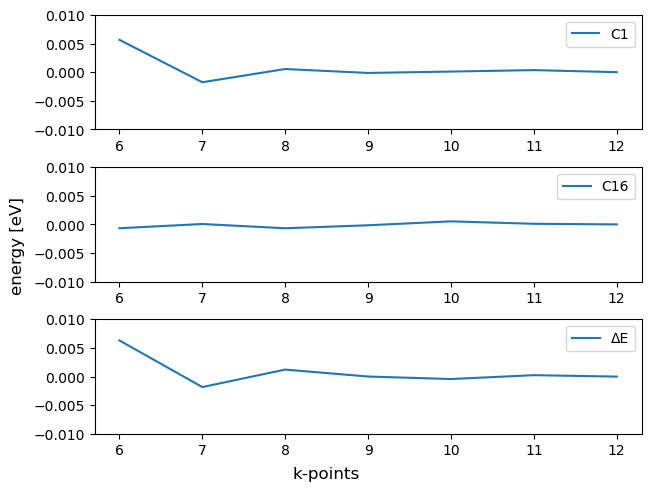

In [48]:
fig, (ax, ax2, ax3) = plt.subplots(3, 1, constrained_layout = True)
fig.supxlabel('k-points')
fig.supylabel('energy [eV]')

ax.plot(k, kec1, label = 'C1')
ax2.plot(k, kec16, label = 'C16')
ax3.plot(k, kde, label = 'ΔE')

ax.legend()
ax2.legend()
ax3.legend()

ax.set_ylim(-0.01, 0.01)
ax2.set_ylim(-0.01, 0.01)
ax3.set_ylim(-0.01, 0.01)

plt.show()

In [2]:
fcut = open('ecutoff_data.csv', 'r')
cline = fcut.readlines()

c = []
cec1 = []
cec16 = []
cde = []

for line in cline:
    ce = line.split()[0].split(',')
    c.append(int(ce[0]))
    cec1.append(float(ce[1])*13.6057)
    cec16.append(float(ce[2])*13.6057)
    cde.append(float(ce[1])-float(ce[2])*13.6057)

cres = len(c)
    

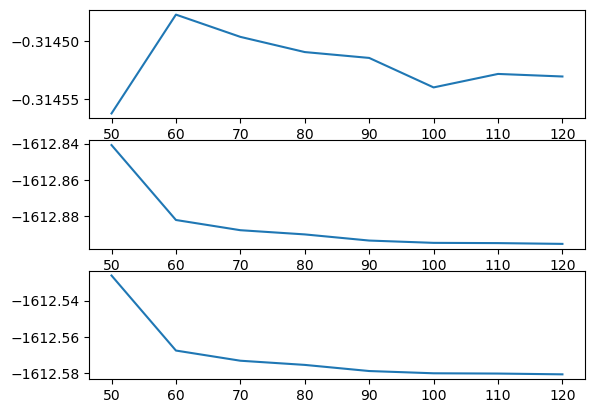

In [4]:
fig, (ax, ax2, ax3) = plt.subplots(3, 1, )

ax.plot(c, cde)
ax2.plot(c, cec1)
ax3.plot(c, cec16)
plt.show()

In [4]:
from pymatgen.io import pwscf
import pymatgen.core as core

v0 = 700.0
v = v0
a = (v*2)**(1/3)
cut = 100
k = 10

pseudodict = {"Ag":"pbe-n-rrkjus_psl.1.0.0.UPF",
              "Au":"pbe-n-rrkjus_psl.1.0.0.UPF",
              "Cu":"pbe-dn-rrkjus_psl.1.0.0.UPF",
              "In":"pbe-dn-rrkjus_psl.1.0.0.UPF"}

element1 = "Cu"
element2 = "In"

c1structure = core.Structure(lattice=[[a, a, 0],[0, a, a], [a, 0, a]],
                                 species=[element1, element2, element2], 
                                 coords=[[0, 0, 0], [0.25, 0.25, 0.25], [-0.25, -0.25, -0.25]])
c1pwinput = pwscf.PWInput(control = {"calculation": "scf", "pseudo_dir":"./pseudos/"},
                          system= {"ibrav":0, "ecutwfc":cut, "nbnd":40, "nat":3, 
                                   "occupations":"smearing", "smearing":"gaussian", "degauss":0.01},
                          electrons={"mixing_beta":0.6},
                          structure=c1structure,
                          pseudo = {element1: pseudodict[element1], element2: pseudodict[element2]},
                          kpoints_grid=(k, k, k), kpoints_shift=(1, 1, 1))

str(c1pwinput)

"&CONTROL\n  calculation = 'scf',\n  pseudo_dir = './pseudos/',\n/\n&SYSTEM\n  degauss = 0.01,\n  ecutwfc = 100,\n  ibrav = 0,\n  nat = 3,\n  nbnd = 40,\n  occupations = 'smearing',\n  smearing = 'gaussian',\n  ntyp = 2,\n/\n&ELECTRONS\n  mixing_beta = 0.6,\n/\n&IONS\n/\n&CELL\n/\nATOMIC_SPECIES\n  Cu  63.5460 pbe-dn-rrkjus_psl.1.0.0.UPF\n  In  114.8180 pbe-dn-rrkjus_psl.1.0.0.UPF\nATOMIC_POSITIONS crystal\n  Cu 0.000000 0.000000 0.000000\n  In 0.250000 0.250000 0.250000\n  In -0.250000 -0.250000 -0.250000\nK_POINTS automatic\n  10 10 10 1 1 1\nCELL_PARAMETERS angstrom\n  11.186889 11.186889 0.000000\n  0.000000 11.186889 11.186889\n  11.186889 0.000000 11.186889"

In [7]:
num = 1230.1532875234
num2 = 13
print("a%ibc%i.in"%(num,num2))

a1230bc13.in


In [32]:
v = []
e = []

with open('C1_data.csv') as f:
    lines = f.readlines()
    for line in lines:
        ve = line.split(',')
        v.append(float(ve[0]))
        e.append(float(ve[1]))


vol, bmod, p, res = eos.eos_fit('birch', v, e, units=('Ryd', 'bohr'))

In [33]:
def plot_f(f, a, b, N, symbol='o', title = None):
    x = np.linspace(a, b, N)
    y = list(map(f, x))
    plt.plot(x, y, symbol, label=title)

444.69361231357055


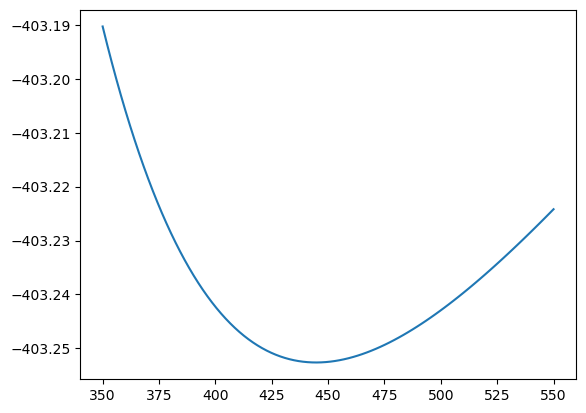

In [37]:
ene = p[0]
reso = len(v)
plot_f(lambda x: eos.eos_birch(p,x), v[0], 550, 100, symbol='-')

print(vol)